<a href="https://colab.research.google.com/github/Patrikovik/An-lise-base-fiminic-dio/blob/master/An%C3%A1lise_Microdados_ENEM_2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este estudo faz parte de um programa de imersão **(QUARENTENADADOS) ** conduzido pela ALURA. A análise de dados do enem de 2018 é referente aos desafios propostos nas últimas duas aulas da semana. 

 O principal objetivo deste estudo é, primeiramente, a realização de uma análise exploratória de uma pequena parte da base de microdados do enem disponibilziado pelo INEP. Na segunda, são conduzidas análises para tentar responder se existe alguma forma de prever a nota de uma determinada disciplina (i.e Matemática) a partir das outras notas (e.g Ciências_Naturias, Linguagem e Códigos, Ciências Humanas e Redação). 

##E aí, será que é possível??


In [0]:
#importando a base de dados.
import pandas as pd 
uri = "https://raw.githubusercontent.com/guilhermesilveira/enem-2018/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv"
dados = enem_2018 = pd.read_csv(uri)

In [51]:
dados.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [52]:
notas = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']
dados[notas].head(10)


,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,NaN,NaN,NaN,NaN,NaN
1,523.1,671.3,661.6,738.0,680.0
2,409.2,531.7,389.0,438.1,600.0
3,452.3,505.5,448.5,544.9,400.0
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,428.5,505.2,521.0,436.8,560.0
7,NaN,NaN,NaN,NaN,NaN
8,491.8,575.7,524.4,487.6,660.0
9,568.0,650.5,633.1,587.6,520.0


In [53]:
#EXISTE UMA PARCELA RELEVANTE DE NaN. SERÁ QUE SÃO ATRIBUÍDOS PARA PESSOAS QUE TIRAM NOTA ZERO OU SÃO ATRIBUÍDOS AOS FALTANTES?
dados.query('NU_NOTA_CN == 0 or NU_NOTA_CH == 0')[notas]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
319,0.0,NaN,NaN,894.3,NaN
1211,0.0,582.0,530.5,386.6,340.0
3824,413.6,0.0,464.7,490.4,480.0
4178,NaN,0.0,324.2,NaN,360.0
4422,NaN,0.0,0.0,NaN,360.0
...,...,...,...,...,...
134011,NaN,0.0,523.4,NaN,640.0
136118,417.4,0.0,0.0,480.4,220.0
136388,481.7,0.0,0.0,484.9,340.0
136420,524.8,0.0,318.8,449.4,580.0


In [54]:
#Bom, como se pode observar, quem 'tira' zero em um prova recebe esta nota. Analisando novamente as colunas observa-se que existe a marcação de presença na base de dados.
presenca = ['TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']
dados[presenca]

,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1.0,523.1,671.3,661.6,738.0,680.0
2,1.0,1.0,1.0,1.0,409.2,531.7,389.0,438.1,600.0
3,1.0,1.0,1.0,1.0,452.3,505.5,448.5,544.9,400.0
4,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
137839,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
137840,1.0,1.0,1.0,1.0,382.4,534.2,468.1,576.4,380.0
137841,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
137842,1.0,1.0,1.0,1.0,452.7,509.3,527.7,591.4,300.0


In [55]:
#Observando o dataframe acima, nota-se claramente que 'NaN' é atribuído a quem falta durante a prova. 
#Como este dado não é interessante para o escopo desta análise,ópto por retirar o 'NaN' da tabela.
dados_sem_nan = dados.dropna().copy()
dados_sem_nan[presenca]

,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
6,1.0,1.0,1.0,1.0,428.5,505.2,521.0,436.8,560.0
10,1.0,1.0,1.0,1.0,630.2,651.5,625.9,767.5,800.0
11,1.0,1.0,1.0,1.0,591.4,622.3,614.9,584.1,680.0
18,1.0,1.0,1.0,1.0,490.8,435.1,531.7,616.4,460.0
24,1.0,1.0,1.0,1.0,416.0,631.0,612.3,526.1,600.0
...,...,...,...,...,...,...,...,...,...
137797,1.0,1.0,1.0,1.0,626.6,658.3,622.7,601.8,760.0
137804,1.0,1.0,1.0,1.0,460.8,560.5,519.5,467.1,480.0
137819,1.0,1.0,1.0,1.0,392.0,432.6,402.8,536.4,280.0
137827,1.0,1.0,1.0,1.0,546.0,630.2,625.0,725.6,700.0


In [56]:
#Com o NaN retirado, pode-se iniciar uma análise descritiva das notas. 
dados_sem_nan[notas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
count,26568.000000,26568.000000,26568.000000,26568.000000,26568.000000
mean,492.468312,565.264457,524.522234,536.336902,520.371876
std,74.627920,80.257840,73.091475,102.715938,191.857230
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,433.675000,505.575000,472.900000,456.900000,360.000000
50%,481.000000,578.050000,529.100000,516.600000,520.000000
75%,542.700000,625.700000,578.000000,600.900000,640.000000
max,869.600000,850.400000,757.500000,988.500000,980.000000


In [0]:
#Agora, é possível se pergutar... Será que existe alguma correlação mínima entre as notas? Para responder esta pergunta, existe uma função da lib seborn
#chamada pairplot que gera gráficos de um cujunto determinado de dados passado como parâmetros tomados 2 a 2 (C(N,2)). 

In [0]:
import seaborn as sns
from matplotlib import pyplot as plt

In [0]:
def pair(dados_pair): 
  plt.figure(figsize = (5,5))
  sns.pairplot(dados_pair, diag_kind='kde')
  plt.show()

<Figure size 360x360 with 0 Axes>

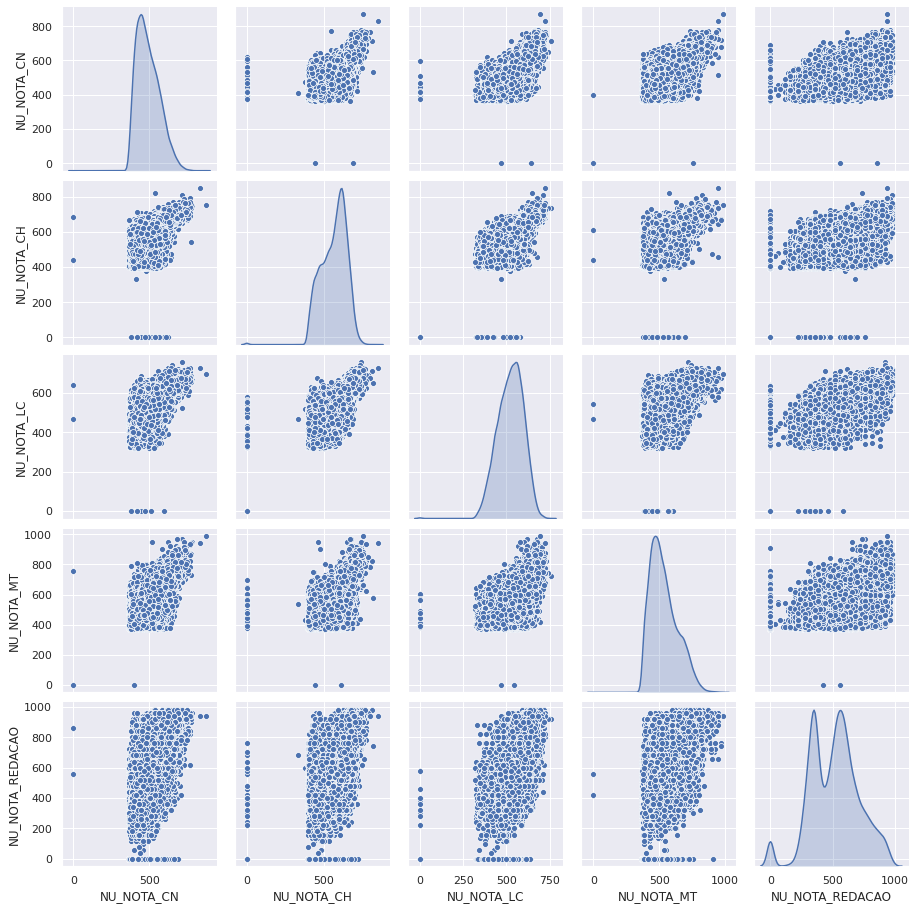

In [60]:
pair(dados_sem_nan[notas])

In [0]:
#Existe uma forma mais objetiva de obter o mesmo resultado:
def notas_plot (data):
  sns.set(font_scale = 1.2)
  labels = ['Ciencias da natureza','Ciencias humanas','Linguagem e Códigos','Matemágica','Redação']
  plt.figure(figsize=(6,6))
  ax = sns.heatmap(data, annot = True, cmap = "YlGnBu", xticklabels=labels,yticklabels=labels)
  plt.show()
  sns.set()


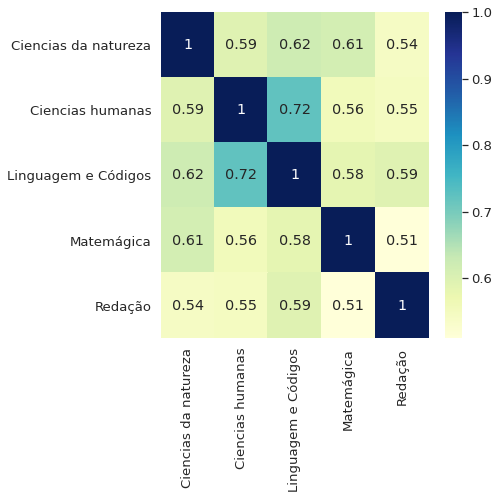

In [62]:
notas_plot(dados_sem_nan[notas].corr())

In [0]:
#Dentro do universo observado, a maior correlação que se pode encontrar é 0.72 Entre Linguagem e Código e Ciênicas humanas.

In [0]:
#Um questionamento pode ser levantado. Pelo critério de avaliação do Enem, sabe-se que não necessariamente que quem mais acertou em números
#Absolutos consegue a maior nota. Será que existe uma correlação mais contundente se for analisado os valores absolutos de acertos? 
#Para a contagem de acertos é necessário realizar uma comparação das respostas dos alunos eum determinada matéria [e.g TX_RESPOSTAS_LC]

In [0]:
def acertos(aluno,materia):
  resposta = aluno.get(f'TX_RESPOSTAS_{materia}')
  gabarito = aluno.get(f'TX_GABARITO_{materia}')

  if(type(resposta) != str or type(gabarito)!= str):
    return 0
  return sum(a==b for a,b in zip(resposta,gabarito))

In [0]:
dados_3 = dados.copy()
dados_3['CA_CN'] = dados_3.apply(acertos,materia = 'CN', axis=1)
dados_3['CA_CH'] = dados_3.apply(acertos,materia = 'CH', axis=1)
dados_3['CA_LC'] = dados_3.apply(acertos,materia = 'LC', axis=1)
dados_3['CA_MT'] = dados_3.apply(acertos,materia = 'MT', axis=1)
dados_3['CA_TOTAL'] = dados_3['CA_CN'] + dados_3['CA_CH'] + dados_3['CA_LC'] + dados_3['CA_MT']

In [67]:
ca_notas_1 = ['CA_CN','CA_CH','CA_LC','CA_MT','NU_NOTA_REDACAO','CA_TOTAL']
dados_3[ca_notas].sort_values('CA_TOTAL', ascending = False)


,CA_CN,CA_CH,CA_LC,CA_MT,NU_NOTA_REDACAO,CA_TOTAL
96734,42,45,37,39,940.0,163
96872,44,40,33,43,940.0,160
30855,41,40,35,41,860.0,157
24571,40,37,37,41,960.0,155
82547,40,42,35,38,800.0,155
...,...,...,...,...,...,...
74172,0,0,0,0,NaN,0
74173,0,0,0,0,NaN,0
74175,0,0,0,0,NaN,0
74176,0,0,0,0,NaN,0


<Figure size 360x360 with 0 Axes>

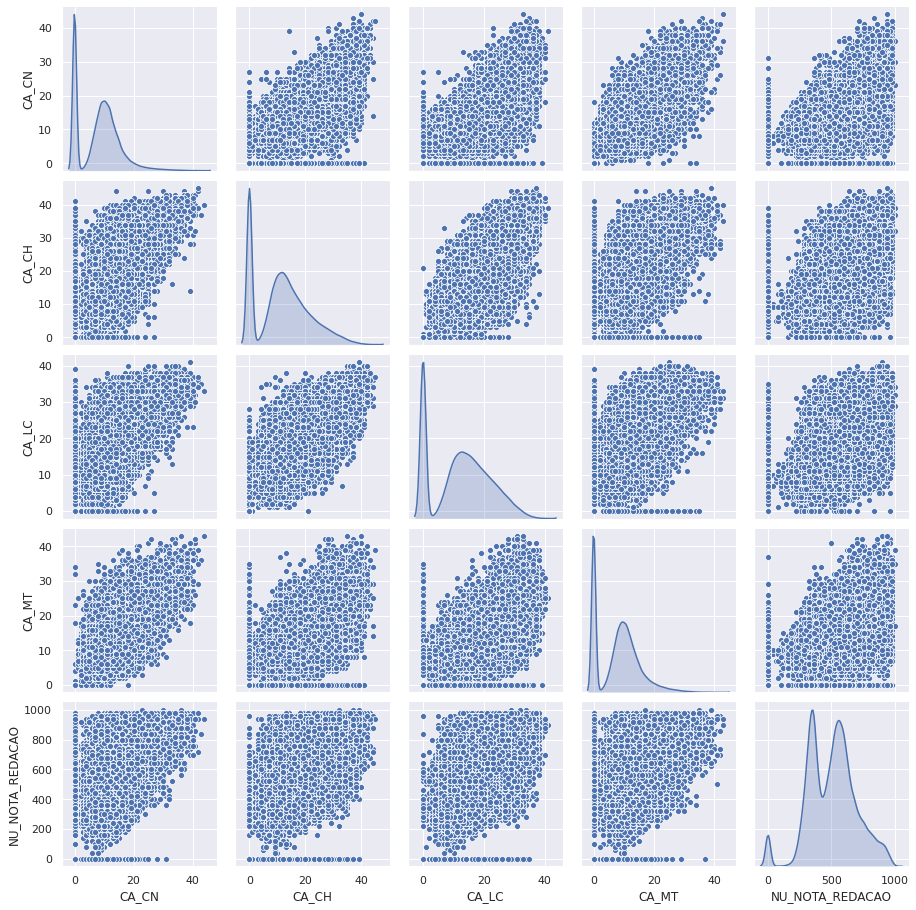

In [68]:
ca_notas_2 = ['CA_CN','CA_CH','CA_LC','CA_MT','NU_NOTA_REDACAO']
pair(dados_3[ca_notas_2])

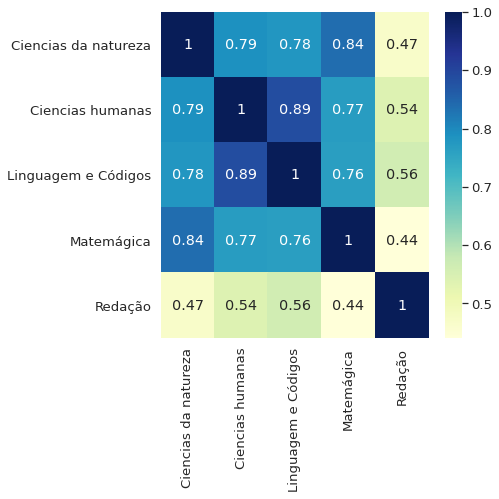

In [69]:
notas_plot(dados_3[ca_notas_2].corr())


In [0]:
# claramente as correlações aumentaram, mas de uma forma proporcional, mantiveram suas posições, caso fossem colocadas de uma forma ordenada. Como os alunos são selecionados 
# pelo Sisu através das notas atribuídas pelo sistema do INEP, prefiro continuar as investigações com o que foi apresentado na base originalmente.

#PARTE DOIS 

#Dado a análise inicial, será que é possível prever a nota de matemática, por exemplo, considerando somente as notas anteriores? Na verdade, a principal pergunta não deveria ser "será que é possível" mas sim "O quão precisa seria uma tentativa de prever uma determinada nota, apartir das demais".

In [0]:
dados_ia = dados[notas].dropna().copy()

In [73]:
dados_ia.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
1,523.1,671.3,661.6,738.0,680.0
2,409.2,531.7,389.0,438.1,600.0
3,452.3,505.5,448.5,544.9,400.0
6,428.5,505.2,521.0,436.8,560.0
8,491.8,575.7,524.4,487.6,660.0


In [0]:
X = dados_ia[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']].copy()
y = dados_ia['NU_NOTA_MT'].copy()

In [0]:
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(43267)

X_treino,X_teste, y_treino, y_teste = train_test_split(X,y)

In [82]:
from sklearn.svm import LinearSVR

modelo = LinearSVR(max_iter = 10000)
modelo.fit(X_treino,y_treino)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=None, tol=0.0001, verbose=0)

In [0]:
y_previsto = modelo.predict(X_teste)

In [94]:
y_real = y_teste
X_teste

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
41528,487.3,489.6,420.2,360.0
81918,506.4,605.1,545.6,720.0
22786,397.6,561.3,518.1,320.0
17935,444.7,410.3,539.2,580.0
70617,473.4,600.2,536.9,360.0
...,...,...,...,...
54239,453.3,459.0,519.2,600.0
98861,516.6,653.0,612.6,960.0
105209,454.3,587.6,511.1,380.0
110757,626.0,641.0,540.0,660.0


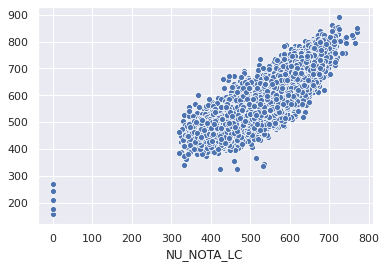

In [96]:
sns.scatterplot(y=y_previsto,x=X_teste['NU_NOTA_LC'])